In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0019-1046"
band = "R_SPECIAL"
mjds = [60201, 60202, "All"]

#Star far from target, only used for seeing but not for position offsets. Assume the ones from W0204-0506.
star_ex_ref = 1145
star_ey_ref = 37.5

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.0

mkdir: stamps: File exists


-0.0 -90.4


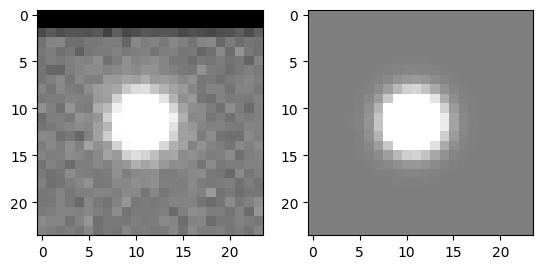

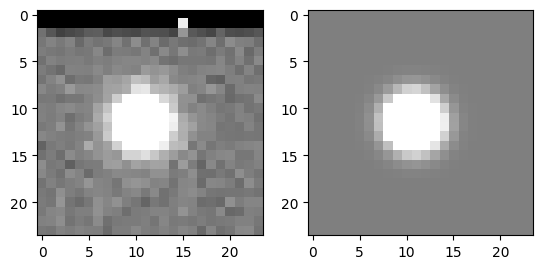

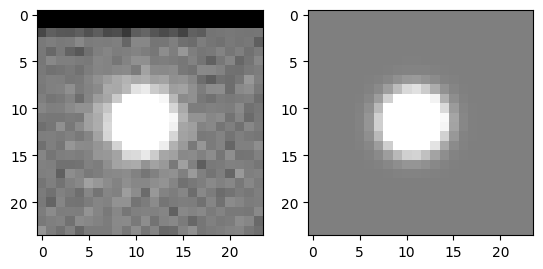

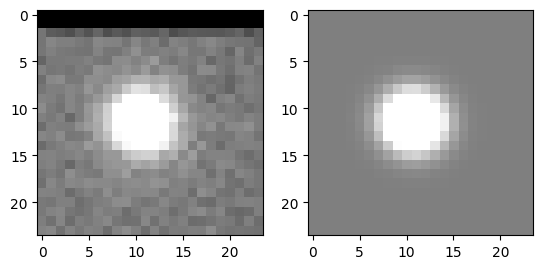

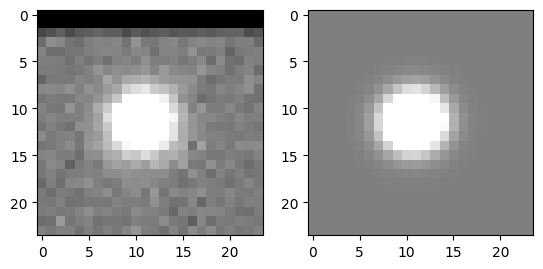

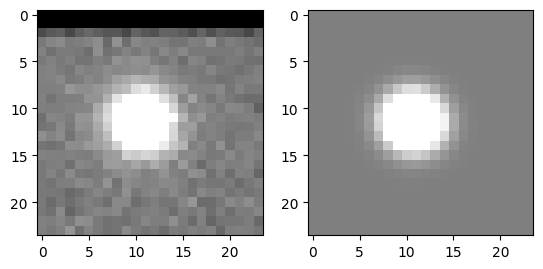

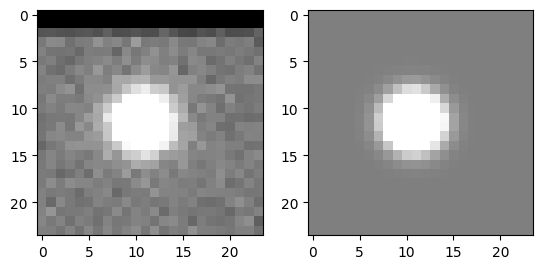

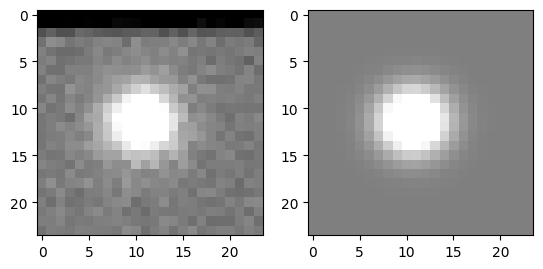

[1.10502189 1.03986245 1.05307247 1.22820506 1.18829702 1.1382902
 1.04663679 1.41808757]
Target FWHM:  1.5
1.709361584958285 0.43075911940948786


Target FWHM:  1.5
1.8217579433678455 0.45908300172869704


Target FWHM:  1.5
1.800080215940266 0.45362021441694705


Target FWHM:  1.5
1.4511119626975695 0.3656802145997875


Target FWHM:  1.5
1.5425911653761073 0.38873297367477905


Target FWHM:  1.5
1.6462021222882506 0.41484293481663914


Target FWHM:  1.5
1.8107078173375268 0.45629836996905676


Target FWHM:  1.5
0.8238834939526942 0.20761864047607895


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.5


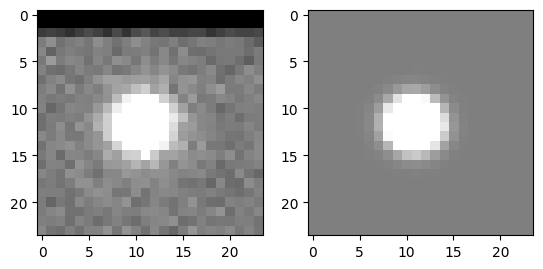

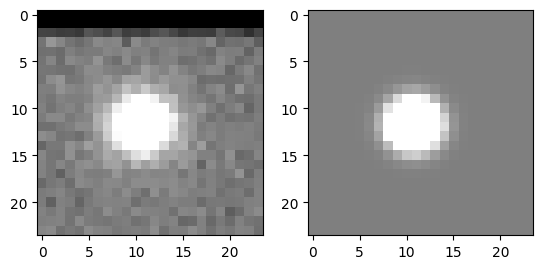

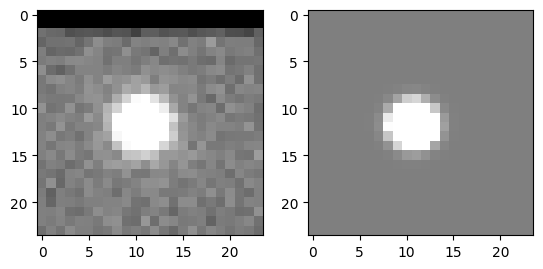

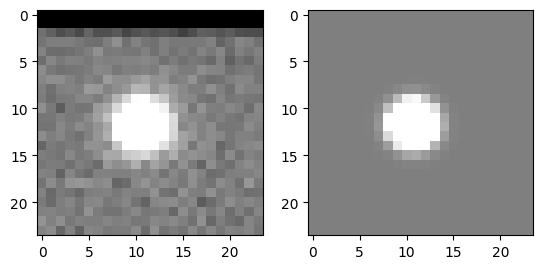

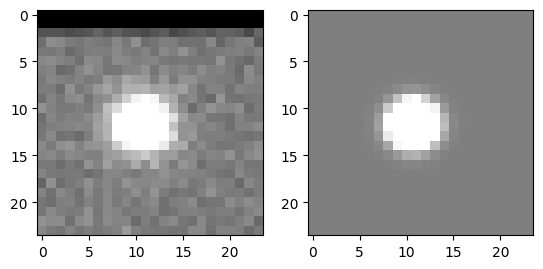

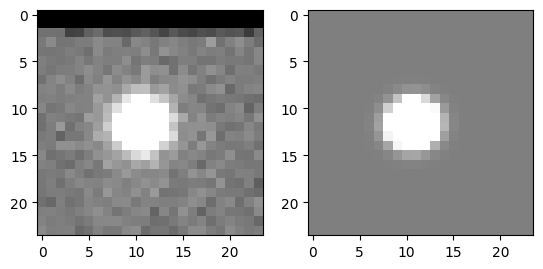

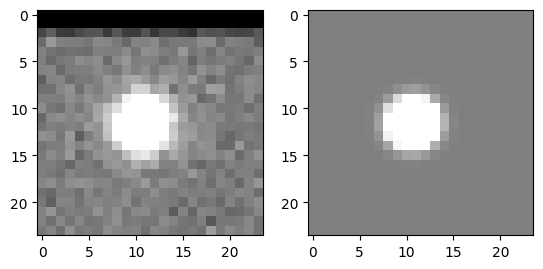

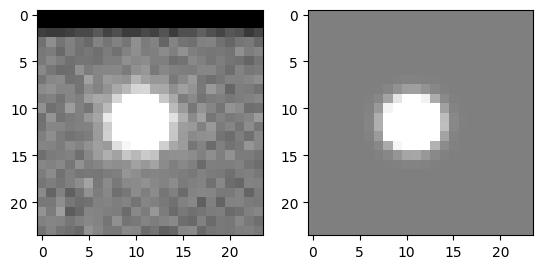

[0.92312543 0.93319412 0.70730909 0.76943956 0.81783517 0.78994311
 0.78451913 0.81739691]
Target FWHM:  1.0
0.64794313974792 0.16328167121647583


Target FWHM:  1.0
0.6056013332300866 0.15261153597398183


Target FWHM:  1.0
1.1912486659634747 0.30019466382279564


Target FWHM:  1.0
1.0763462393905276 0.271239252326413


Target FWHM:  1.0
0.9697309294557214 0.2443721942228418


Target FWHM:  1.0
1.0333080515108926 0.2603936289807449


Target FWHM:  1.0
1.0449769135555316 0.263334182215994


Target FWHM:  1.0
0.9707797072251133 0.24463648622072856


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.0 -90.4


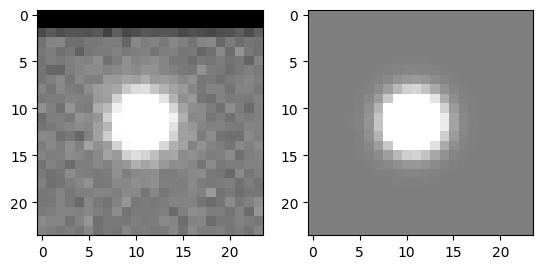

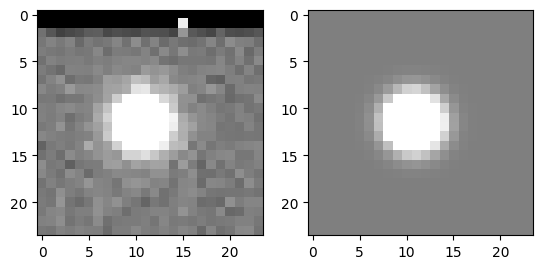

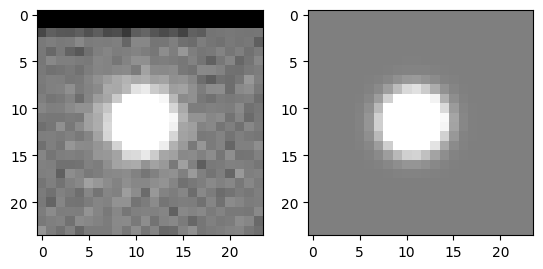

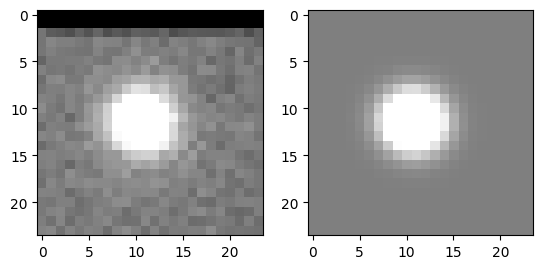

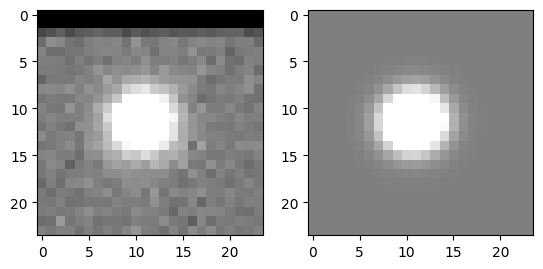

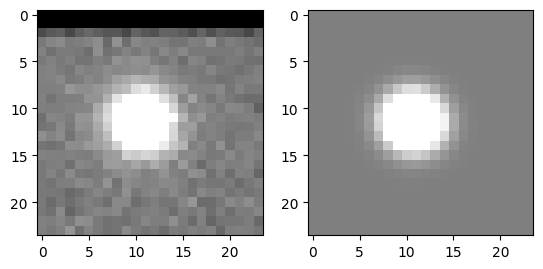

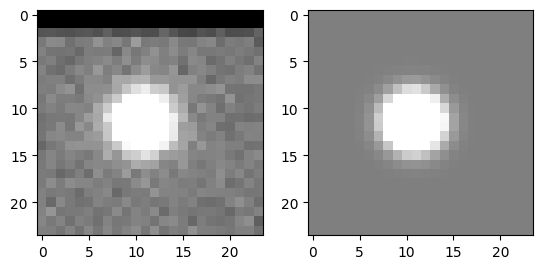

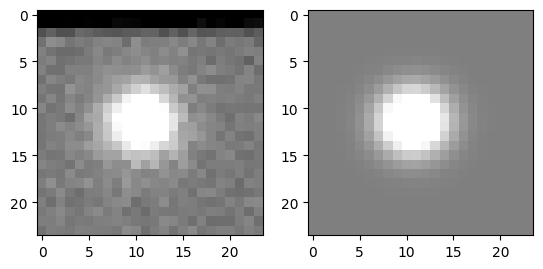

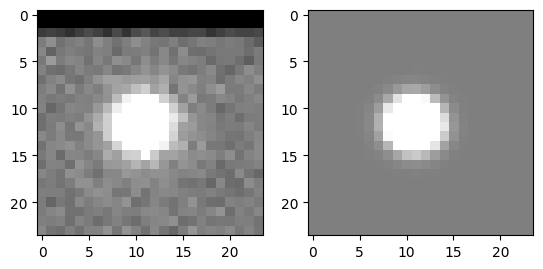

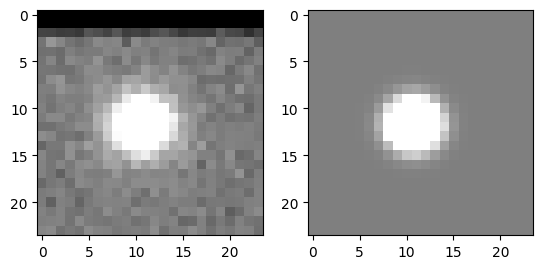

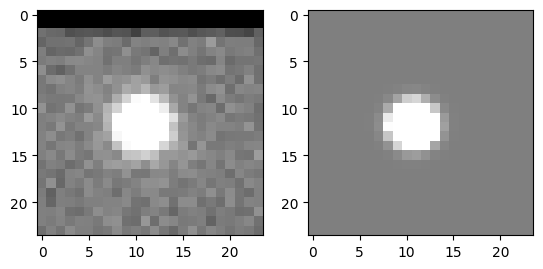

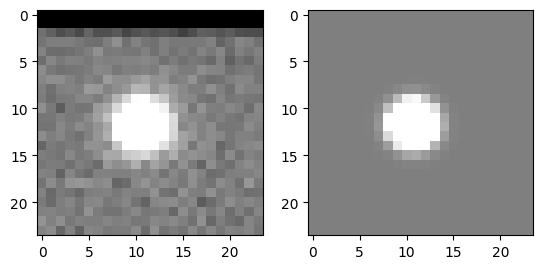

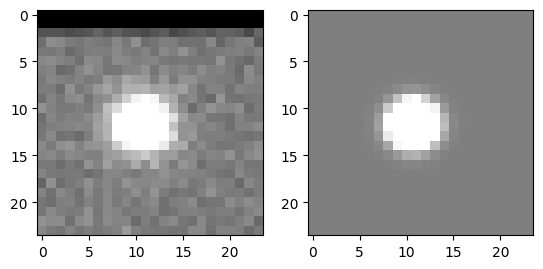

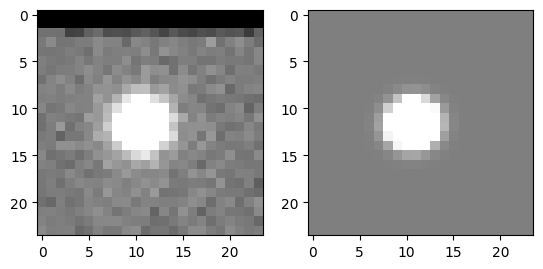

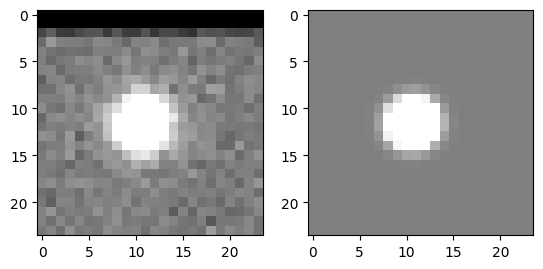

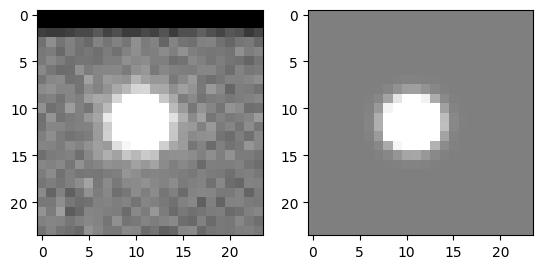

[1.10502189 1.03986245 1.05307247 1.22820506 1.18829702 1.1382902
 1.04663679 1.41808757 0.92312543 0.93319412 0.70730909 0.76943956
 0.81783517 0.78994311 0.78451913 0.81739691]
Target FWHM:  1.5
1.709361584958285 0.43075911940948786


Target FWHM:  1.5
1.8217579433678455 0.45908300172869704


Target FWHM:  1.5
1.800080215940266 0.45362021441694705


Target FWHM:  1.5
1.4511119626975695 0.3656802145997875


Target FWHM:  1.5
1.5425911653761073 0.38873297367477905


Target FWHM:  1.5
1.6462021222882506 0.41484293481663914


Target FWHM:  1.5
1.8107078173375268 0.45629836996905676


Target FWHM:  1.5
0.8238834939526942 0.20761864047607895


Target FWHM:  1.5
1.9923717758284196 0.5020776875087617


Target FWHM:  1.5
1.9790068103928689 0.49870971621900295


Target FWHM:  1.5
2.2290779180932767 0.5617276353595058


Target FWHM:  1.5
2.1698470471029587 0.5468014558699456


Target FWHM:  1.5
2.1189839679229183 0.5339839599165754


Target FWHM:  1.5
2.148823052298289 0.5415034091791688


Target FWHM:  1.5
2.1544585701830847 0.5429235596861374


Target FWHM:  1.5
2.11946413527839 0.5341049620901543


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for mjd in mjds:
    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=1.5, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

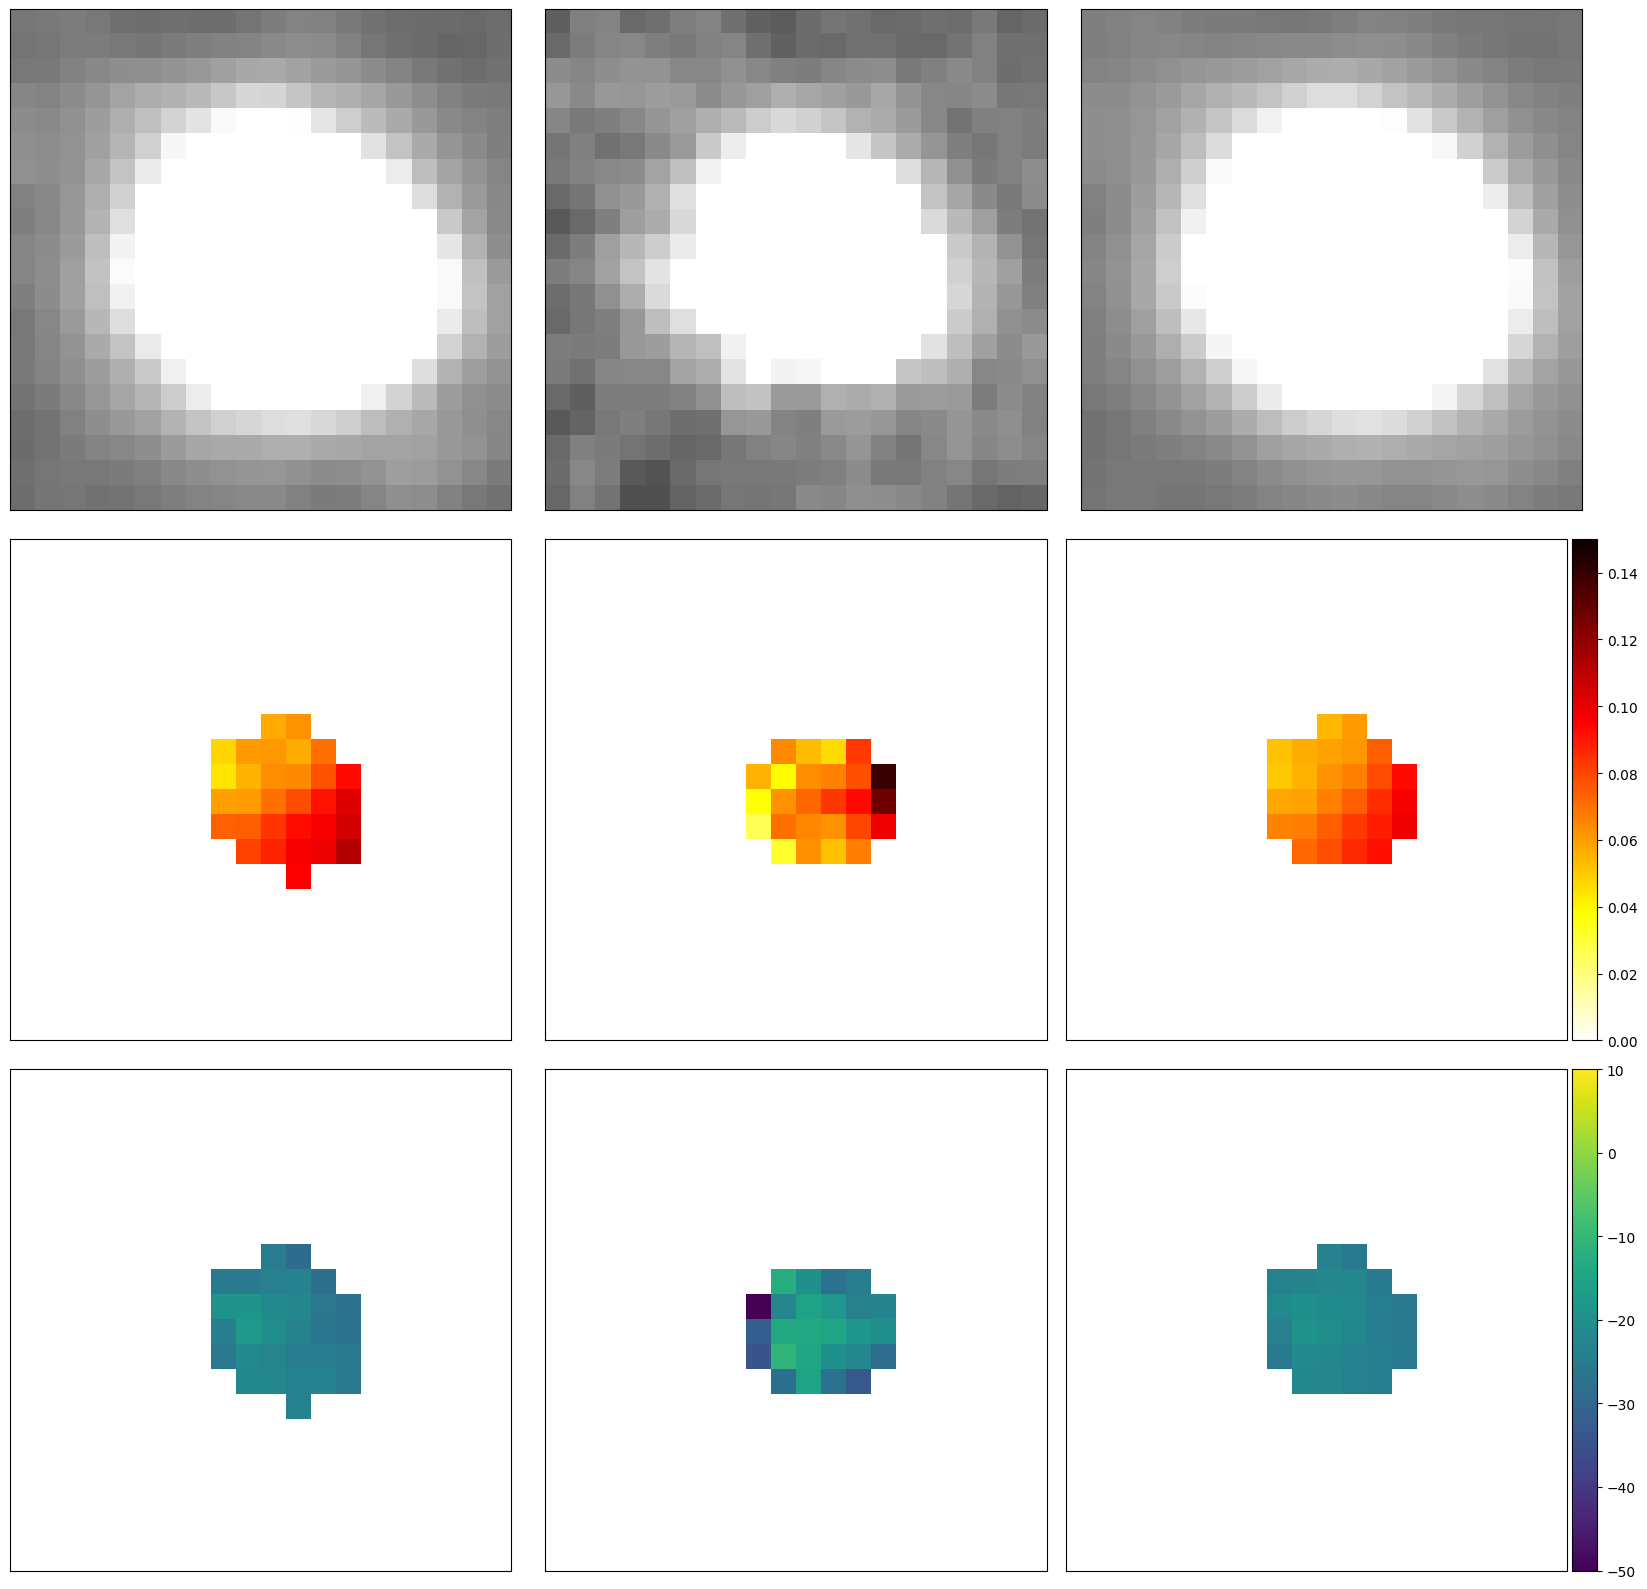

In [5]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0., vmax=0.15)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0., vmax=0.15)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0., vmax=0.15)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-50, vmax=10)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

fig.tight_layout()
plt.show()